In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
from sympy import *
import math
from scipy.misc import derivative
from numpy import linalg as LA

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [59]:
a = -1
for id_1 in enumerate(raitings):
    a += 1
    b = -1
    c = 0
    for id_2 in enumerate(raitings):
        b += 1
        aLength = np.linalg.norm( raitings[id_1] )
        bLength = np.linalg.norm( raitings[id_2] )
        cos = np.dot( raitings[id_1], raitings[id_2] ) / ( aLength * bLength )
        if c < cos and cos < 0.999:
            c = cos
            di = b
    print('Наиболее похожие пользователи', a+1, di+1, "cos",c)

Наиболее похожие пользователи 1 9 cos 0.8904246658040822
Наиболее похожие пользователи 2 7 cos 0.9226356281699976
Наиболее похожие пользователи 3 10 cos 0.8942346243792992
Наиболее похожие пользователи 4 1 cos 0.7863774049888025
Наиболее похожие пользователи 5 10 cos 0.9224685144144227
Наиболее похожие пользователи 6 10 cos 0.8926287529660395
Наиболее похожие пользователи 7 2 cos 0.9226356281699976
Наиболее похожие пользователи 8 10 cos 0.9219535419423169
Наиболее похожие пользователи 9 10 cos 0.9562047775774617
Наиболее похожие пользователи 10 9 cos 0.9562047775774617


In [76]:
from sklearn.decomposition import PCA

In [81]:
# PCA позволяет уменьшить размерность данных, потеряв наименьшее количество информации.
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(raitings)
principalComponents

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 ],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166]])

## Задание 2

In [21]:
def f(x):
    return tan(sin(x) + cos(2*x+3))**2

In [22]:
derivative(f, 1, dx = 1e-6)

55.3859176433136

## Задание 3

In [2]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

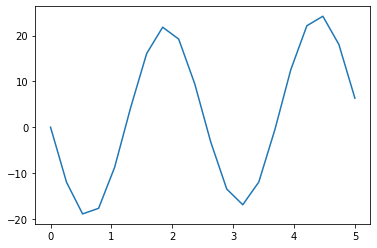

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

In [5]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [9]:
res = minimize(error, [0,0], method='COBYLA') 
res

     fun: 0.07674566113889902
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

In [ ]:
# [ 3.00018796, -2.50008926] параметры a, b

## Задание 4

In [44]:
x = np.random.randint(1, 1000, size = 20)

In [54]:
a = np.array([])
i = 0
while (i < 1000):
    i += 1
    x = np.random.randint(1, 100, size = 50)
    a = np.append(a, np.mean(x))

(array([ 1.,  0.,  0.,  1.,  1.,  3.,  3.,  2.,  3.,  8.,  9., 13., 16.,
        17., 22., 20., 34., 20., 38., 42., 55., 39., 46., 41., 44., 44.,
        54., 48., 50., 48., 38., 26., 27., 36., 28., 21., 20., 19., 12.,
        11., 15.,  7.,  6.,  3.,  4.,  1.,  2.,  1.,  0.,  1.]),
 array([37.14  , 37.6436, 38.1472, 38.6508, 39.1544, 39.658 , 40.1616,
        40.6652, 41.1688, 41.6724, 42.176 , 42.6796, 43.1832, 43.6868,
        44.1904, 44.694 , 45.1976, 45.7012, 46.2048, 46.7084, 47.212 ,
        47.7156, 48.2192, 48.7228, 49.2264, 49.73  , 50.2336, 50.7372,
        51.2408, 51.7444, 52.248 , 52.7516, 53.2552, 53.7588, 54.2624,
        54.766 , 55.2696, 55.7732, 56.2768, 56.7804, 57.284 , 57.7876,
        58.2912, 58.7948, 59.2984, 59.802 , 60.3056, 60.8092, 61.3128,
        61.8164, 62.32  ]),
 <BarContainer object of 50 artists>)

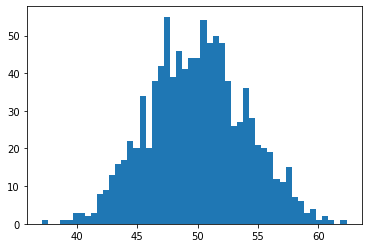

In [60]:
plt.hist(a,50)

### Задание 5

In [4]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [6]:
w,v = LA.eig(m)

In [7]:
print(w)1-λ

[ 3. -1.]


In [8]:
print(v)

[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


In [ ]:
# Решение на бумаге
[1, 4] = [1-λ , 4] = (1-λ)(1-λ) - 4 = 1 - 2λ + λ**2 - 4 = λ**2 - 2λ - 3
[1, 1]   [1, 1-λ ]

λ1 = 3
λ2 = -1


In [ ]:
#Собственные векторы
[x1, 4x2 = 3x1 
[x1, x2  = 3x2
 
[x1, 4x2 = -x1 
[x1, x2  = -x2
 
 